In [81]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf

model_path = "/content/drive/MyDrive/projects/models/age_gender_model_v.keras"
model = tf.keras.models.load_model(model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import kagglehub
jangedoo_utkface_new_path = kagglehub.dataset_download('jangedoo/utkface-new')

print(jangedoo_utkface_new_path)

/kaggle/input/utkface-new


In [83]:
import os
import cv2
import numpy as np

data_path = "/kaggle/input/utkface-new/UTKFace/"

IMG_SIZE = 128
images, ages, genders = [], [], []

for file in os.listdir(data_path):
    if file.endswith(".jpg"):
        try:
            age, gender, _ = file.split("_")[:3]
            age = int(age)
            gender = int(gender)

            img = cv2.imread(os.path.join(data_path, file))
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = img.reshape(IMG_SIZE, IMG_SIZE, 1) / 255.0

            images.append(img)
            ages.append(age)
            genders.append(gender)
        except:
            continue

images = np.array(images)
ages = np.array(ages)
genders = np.array(genders)

print("Images:", images.shape)
print("Ages:", ages.shape)
print("Genders:", genders.shape)

Images: (23708, 128, 128, 1)
Ages: (23708,)
Genders: (23708,)


In [86]:
gender_pred , age_pred = model.predict(images)

741/741 ━━━━━━━━━━━━━━━━━━━━ 231s 312ms/step


In [89]:
from sklearn.metrics import mean_absolute_error
age_mae = mean_absolute_error(ages, age_pred.flatten())
print(f"Age MAE: {age_mae:.2f}")

Age MAE: 4.29


In [91]:
from sklearn.metrics import accuracy_score
gender_pred_classes = (gender_pred > 0.5).astype("int32")
gender_acc = accuracy_score(genders, gender_pred_classes)
print(f"Gender Accuracy: {gender_acc * 100:.2f}%")

Gender Accuracy: 92.53%


In [101]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_gender = (gender_pred > 0.5).astype("int32")

<Figure size 600x500 with 0 Axes>

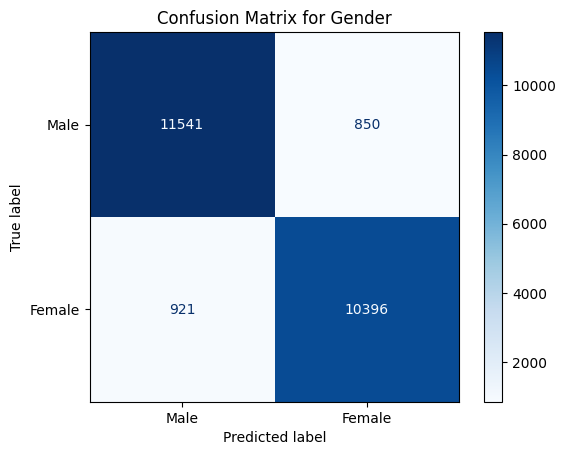

In [100]:
# Confusion Matrix

cm = confusion_matrix(genders, y_pred_gender)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Male", "Female"])
plt.figure(figsize=(6,5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix for Gender")
plt.show()

In [102]:
# Precision, Recall, F1

precision = precision_score(genders, y_pred_gender)
recall = recall_score(genders, y_pred_gender)
f1 = f1_score(genders, y_pred_gender)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 0.92
Recall: 0.92
F1 Score: 0.92


In [103]:
# Classification Report (Text)

report = classification_report(genders, y_pred_gender, target_names=["Male","Female"])
print("\nClassification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

        Male       0.93      0.93      0.93     12391
      Female       0.92      0.92      0.92     11317

    accuracy                           0.93     23708
   macro avg       0.93      0.93      0.93     23708
weighted avg       0.93      0.93      0.93     23708



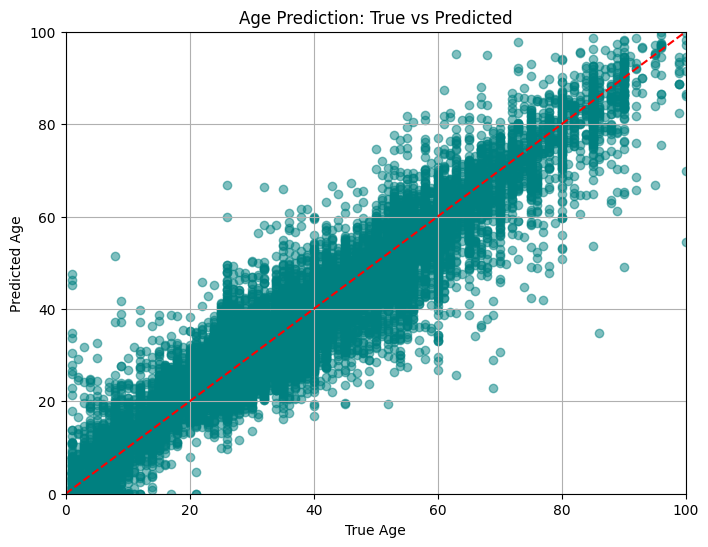

In [99]:
import matplotlib.pyplot as plt
import numpy as np

age_pred_flat = age_pred.flatten()
ages_true = ages

# Scatter Plot: Predicted vs True Ages
plt.figure(figsize=(8,6))
plt.scatter(ages_true, age_pred_flat, alpha=0.5, color="teal")
plt.plot([0, 100], [0, 100], color="red", linestyle="--")
plt.xlabel("True Age")
plt.ylabel("Predicted Age")
plt.title("Age Prediction: True vs Predicted")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

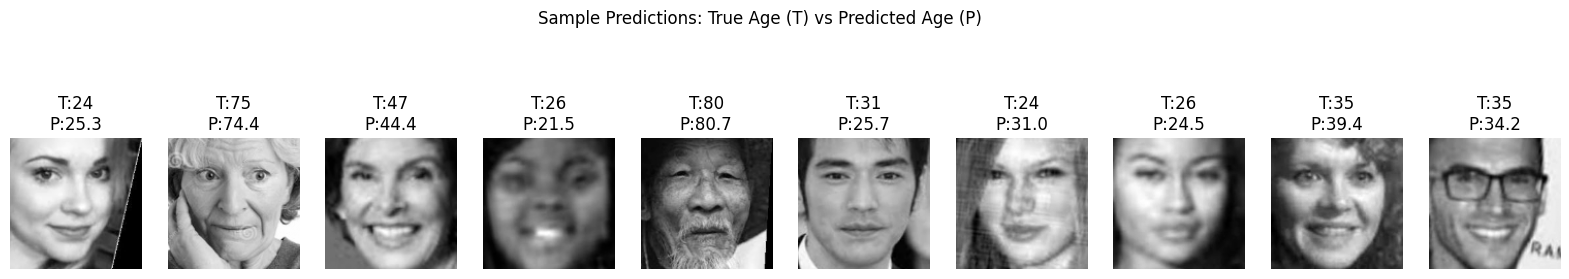

In [98]:
import matplotlib.pyplot as plt
import random

num_samples = 10
indices = random.sample(range(len(images)), num_samples)

plt.figure(figsize=(20,4))

for i, idx in enumerate(indices):
    img = images[idx].reshape(IMG_SIZE, IMG_SIZE)
    true_age = ages[idx]
    pred_age = age_pred[idx][0]

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"T:{true_age}\nP:{pred_age:.1f}")

plt.suptitle("Sample Predictions: True Age (T) vs Predicted Age (P)")
plt.show()

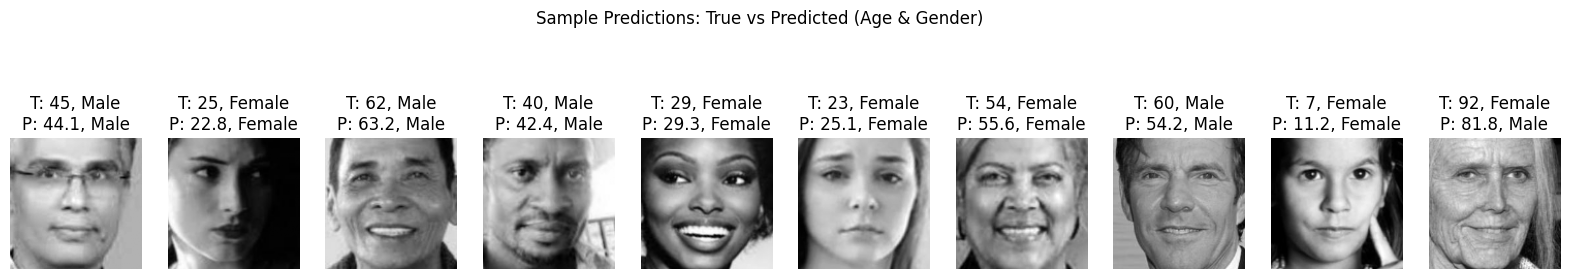

In [120]:
import matplotlib.pyplot as plt
import random
import numpy as np

num_samples = 10
indices = random.sample(range(len(images)), num_samples)

plt.figure(figsize=(20,4))

for i, idx in enumerate(indices):
    img = images[idx].reshape(IMG_SIZE, IMG_SIZE)  # grayscale
    true_age = ages[idx]
    pred_age = age_pred[idx][0]  # predicted age
    true_gender = genders[idx]
    pred_gender = gender_pred[idx][0]  # predicted probability

    # Convert gender to label
    true_gender_label = "Male" if true_gender == 0 else "Female"
    pred_gender_label = "Male" if pred_gender < 0.5 else "Female"

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"T: {true_age}, {true_gender_label}\nP: {pred_age:.1f}, {pred_gender_label}")

plt.suptitle("Sample Predictions: True vs Predicted (Age & Gender)")
plt.show()